In [5]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.grid_search import GridSearchCV
from sklearn import metrics
import time

In [6]:
def clean(data):
    data["Age"] = data["Age"].fillna(data["Age"].mean())
    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2
    return data

In [7]:
# get titanic & test csv files as a DataFrame
data = pd.read_csv("./train.csv", dtype={"Age": np.float64}, )
data = clean(data)
predictors = ["Pclass","Sex","Age","Embarked","SibSp"]
X = data[predictors]
y = data['Survived']
X_train, X_test, y_train,y_test = train_test_split(X,y)

# Default classifiers

## Random Forest

In [9]:
start_time = time.time()
rfc = RandomForestClassifier()
print rfc
rfc.fit(X_train, y_train)
print "Total time took %f seconds" % (time.time()-start_time)
y_pred = rfc.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Total time took 0.024073 seconds
0.775784753363


### ROC curve

In [17]:
prediction_rfc = rfc.predict_proba(X_test)
y_pred_rfc = prediction_rfc[:,1]
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, y_pred_rfc)
roc_auc_rfc = auc(fpr_rfc,tpr_rfc)

## KNN

In [10]:
start_time = time.time()
knn = KNeighborsClassifier()
print knn
knn.fit(X_train, y_train)
print "Total time took %f seconds" % (time.time()-start_time)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Total time took 0.001969 seconds
0.708520179372


### ROC curve

In [18]:
prediction_knn = knn.predict_proba(X_test)
y_pred_knn = prediction_knn[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_knn)
roc_auc_knn = auc(fpr_knn,tpr_knn)

## Logistic Regression

In [11]:
start_time = time.time()
logReg = LogisticRegression()
print logReg
logReg.fit(X_train, y_train)
print "Total time took %f seconds" % (time.time()-start_time)
y_pred = logReg.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Total time took 0.002964 seconds
0.80269058296


### ROC curve

In [19]:
prediction_log = logReg.predict_proba(X_test)
y_pred_log = prediction_log[:,1]
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_log)
roc_auc_log = auc(fpr_log,tpr_log)

### putting all together

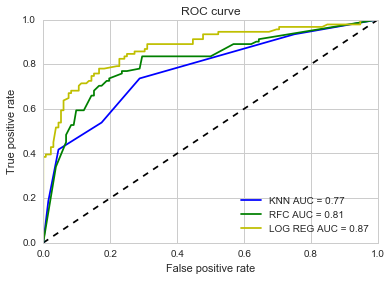

In [20]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, 'b',label = 'KNN AUC = %0.2f' % roc_auc_knn)
plt.plot(fpr_rfc, tpr_rfc, 'g',label = 'RFC AUC = %0.2f' % roc_auc_rfc)
plt.plot(fpr_log, tpr_log, 'y',label = 'LOG REG AUC = %0.2f' % roc_auc_log)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()